# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
#from api_keys import weather_api_key
weather_api_key="7e4d4b459494be9896b3f4740a51e23b"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [31]:
#!pip install citipy

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #change back to 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
print(cities)

['port alfred', 'ushuaia', 'farafangana', 'mar del plata', 'hilo', 'necochea', 'port lincoln', 'watertown', 'mataura', 'salalah', 'zhigansk', 'marovoay', 'vanersborg', 'qaanaaq', 'punta arenas', 'puerto ayora', 'teguldet', 'avarua', 'naze', 'hobart', 'souillac', 'dolbeau', 'yellowknife', 'nome', 'rikitea', 'cidreira', 'mahebourg', 'halalo', 'busselton', 'albany', 'kruisfontein', 'pervomayskoye', 'bethel', 'port elizabeth', 'veraval', 'arteaga', 'walvis bay', 'juneau', 'jamestown', 'maues', 'gravdal', 'cabo san lucas', 'new norfolk', 'taolanaro', 'attawapiskat', 'dudinka', 'butaritari', 'figeac', 'vestmannaeyjar', 'rodrigues alves', 'tasiilaq', 'vardo', 'port moresby', 'kenai', 'grindavik', 'lavrentiya', 'saskylakh', 'poputnaya', 'hithadhoo', 'massaguet', 'plouzane', 'carnarvon', 'sambava', 'ramasukha', 'aykhal', 'bossembele', 'vaitupu', 'santo domingo', 'hermanus', 'bargal', 'upernavik', 'tikhvin', 'rawlins', 'panama city', 'tiksi', 'ca mau', 'tuatapere', 'kumluca', 'lorengau', 'lyubim

In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_list=[]
for ct in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + ct
    try: 
        weather_response = requests.get(query_url)
        city_weather= weather_response.json()
        #print(weather_json)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        weather_list.append({"lat":city_lat,"long":city_lng,"max_temp":city_max_temp, "humidity": city_humidity, 
                         "clouds":city_clouds,"wind":city_wind,"country":city_country,"date": city_date})
    except: 
        print(f"{ct} not found")
        
print(weather_list)

dolbeau not found
halalo not found
taolanaro not found
attawapiskat not found
ramasukha not found
bossembele not found
vaitupu not found
bargal not found
lolua not found
belushya guba not found
illoqqortoormiut not found
barentsburg not found
kamenskoye not found
barbar not found
sentyabrskiy not found
grand river south east not found
mocambique not found
grand centre not found
buqayq not found
malwan not found
yuzhno-yeniseyskiy not found
kilmez not found
bokspits not found
karkaralinsk not found
kuche not found
tsihombe not found
lephepe not found
kesennuma not found
toliary not found
ngukurr not found
mys shmidta not found
chagda not found
rungata not found
umzimvubu not found
hihifo not found
marcona not found
cockburn harbour not found
saleaula not found
jabiru not found
viligili not found
wulanhaote not found
samusu not found
palabuhanratu not found
meyungs not found
tubruq not found
panixtlahuaca not found
lalomanu not found
amderma not found
utiroa not found
tumannyy not found


In [35]:
# weather_df=pd.DataFrame(weather_list)
# weather_df

#decimal was wrong in temp

In [36]:
testing_df =pd.DataFrame(weather_list) 
correct_temp=testing_df['max_temp'].apply(lambda x: x / 10)
dropped=testing_df.drop('max_temp', 1)
dropped.insert(2,"max_temp",correct_temp, True)
weather_df=dropped
weather_df

,lat,long,max_temp,humidity,clouds,wind,country,date
0,-33.5906,26.8910,29.034,82,78,5.23,ZA,1620448139
1,-54.8000,-68.3000,28.015,81,75,1.19,AR,1620448055
2,-22.8167,47.8333,29.242,83,35,2.99,MG,1620448139
3,-38.0023,-57.5575,28.426,100,1,3.66,AR,1620448078
4,19.7297,-155.0900,29.815,69,90,4.15,US,1620448104
...,...,...,...,...,...,...,...,...
570,44.4167,1.3333,28.593,100,40,2.57,FR,1620448311
571,14.8000,74.1333,30.503,61,27,2.21,IN,1620448311
572,35.1478,-114.5683,30.515,8,1,6.69,US,1620448312
573,-30.6497,24.0123,28.204,86,0,3.06,ZA,1620448312


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
#exporting city data into csv 
weather_df.to_csv('./city_dataframe.csv',index=False, header =True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#  Get the indices of cities that have humidity over 100%.


In [39]:
high_humidity = weather_df[weather_df['humidity']>100]
print(high_humidity)

Empty DataFrame
Columns: [lat, long, max_temp, humidity, clouds, wind, country, date]
Index: []


In [40]:
#no cities with humidity above 100

In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [42]:
weather_df.head()

,lat,long,max_temp,humidity,clouds,wind,country,date
0,-33.5906,26.8910,29.034,82,78,5.23,ZA,1620448139
1,-54.8000,-68.3000,28.015,81,75,1.19,AR,1620448055
2,-22.8167,47.8333,29.242,83,35,2.99,MG,1620448139
3,-38.0023,-57.5575,28.426,100,1,3.66,AR,1620448078
4,19.7297,-155.0900,29.815,69,90,4.15,US,1620448104


Text(0.5, 1.0, 'Latitude vs. Temperature Plot')

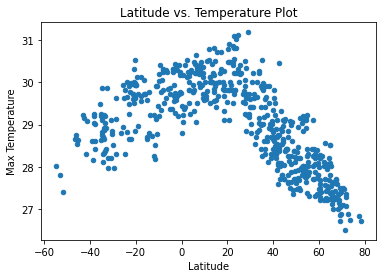

In [43]:
lat_temp = pd.DataFrame({"Latitude": weather_df['lat'], "Max Temperature": weather_df['max_temp']})
lat_temp.plot.scatter(x="Latitude",y='Max Temperature').set_title("Latitude vs. Temperature Plot")

In [44]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling the max temperature to compare to the latitude. 
#the cities closer to the equator have higher max temps than those closer to the poles, which is to be expected. 

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot')

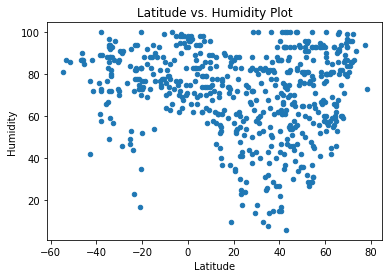

In [45]:
lat_hum = pd.DataFrame({"Latitude": weather_df['lat'], "Humidity": weather_df['humidity']})
lat_hum.plot.scatter(x="Latitude",y='Humidity').set_title("Latitude vs. Humidity Plot")

In [46]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling the humidity to compare to the latitude. 
#most cities tend to be between 60% and 100% which is expected as most places aren't dry. 20th and 40th parallel north and 
    #20th parallel south do have low humidites which is where desert and low humid climates are found.  

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness Plot')

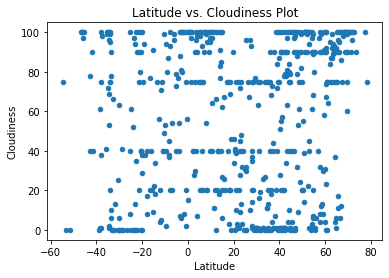

In [47]:
lat_cloud= pd.DataFrame({"Latitude": weather_df['lat'], "Cloudiness": weather_df['clouds']})
lat_cloud.plot.scatter(x="Latitude",y='Cloudiness').set_title("Latitude vs. Cloudiness Plot")

In [48]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling average cloud coverage to compare to the latitude. 


## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

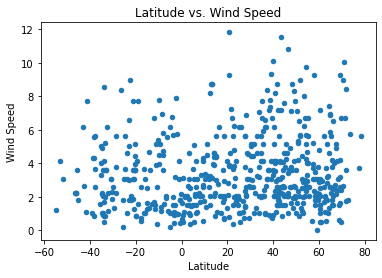

In [49]:
lat_wind = pd.DataFrame({"Latitude": weather_df['lat'], "Wind Speed": weather_df['wind']})
lat_wind.plot.scatter(x="Latitude",y='Wind Speed').set_title("Latitude vs. Wind Speed")

In [50]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling average wind speed to compare to the latitude. 


## Linear Regression

In [51]:
from scipy.stats import linregress
from sklearn import datasets

In [52]:
north_hem=weather_df[weather_df['lat']>=0]
south_hem=weather_df[weather_df['lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

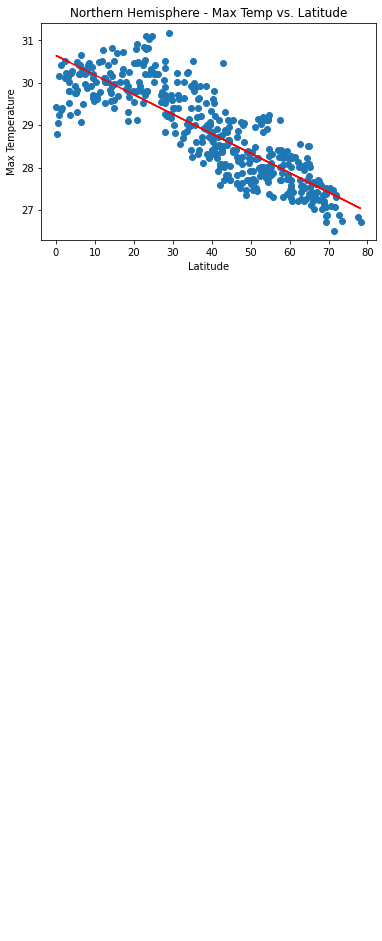

In [53]:
x_val=north_hem['lat']
y_val=north_hem['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.show

In [54]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling the max temperature to compare to the latitude. 
#the cities closer to the equator have higher max temps than those closer to the North pole, so the ave weather gets colder the 
    #further north you go. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

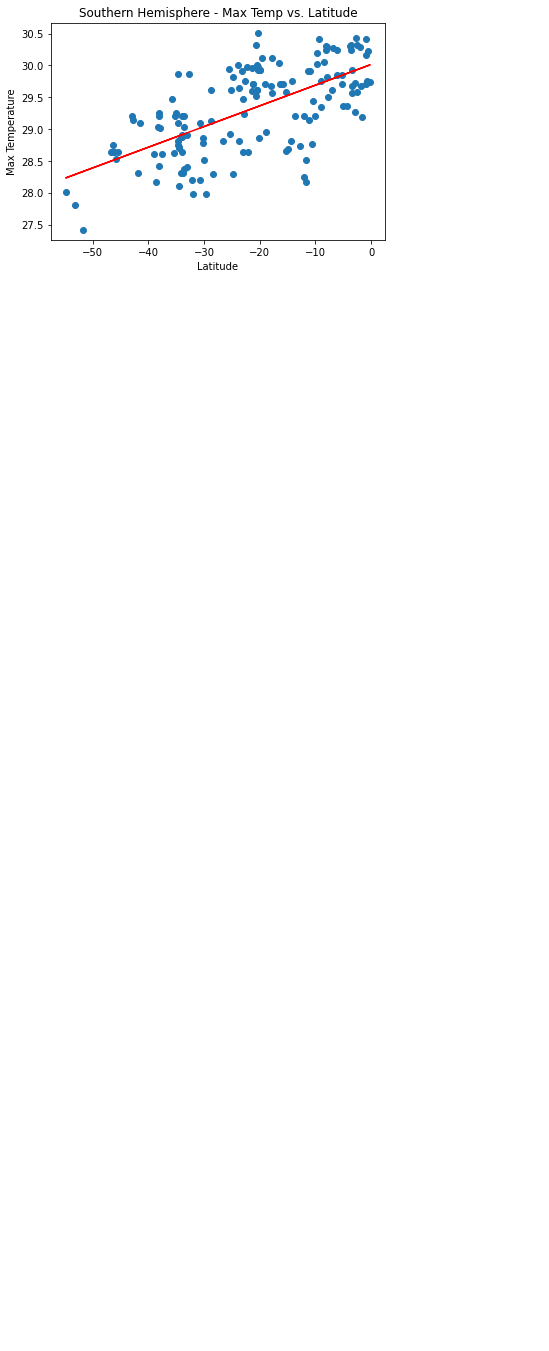

In [55]:
x_val=south_hem['lat']
y_val=south_hem['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.show

In [56]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling the max temperature to compare to the latitude. 
#the cities closer to the equator have higher max temps than those closer to the south pole, the weather gets warmer the more 
    #north you travel. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

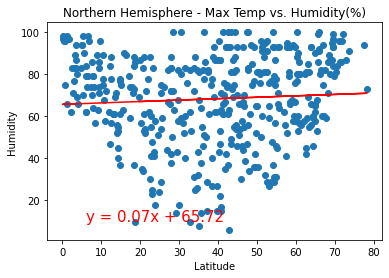

In [57]:
x_val=north_hem['lat']
y_val=north_hem['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Max Temp vs. Humidity(%)")
plt.show

In [58]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling the humidity to compare to the latitude. 
#From this it does not look like latitude impacts the humidity in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

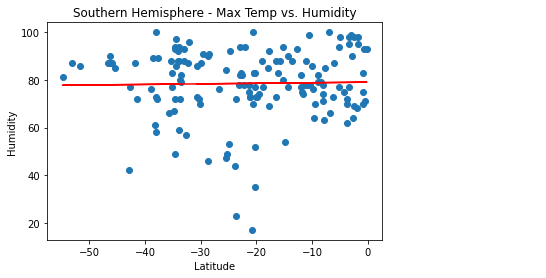

In [59]:
x_val=south_hem['lat']
y_val=south_hem['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Max Temp vs. Humidity")
plt.show

In [60]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling the humidity to compare to the latitude. 
#From this it does not look like latitude impacts the humidity in the southern hemisphere. 
#the lower humidity at the -20 is more noticeable however the line regression is still pretty flat. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

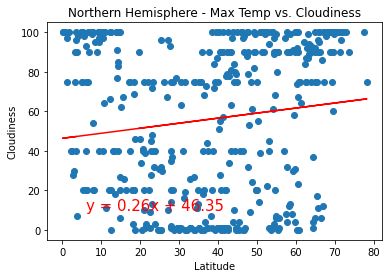

In [61]:
x_val=north_hem['lat']
y_val=north_hem['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Max Temp vs. Cloudiness")
plt.show

In [62]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling average cloud coverage to compare to the latitude. 
#from this I would say the further north you go, the more cloud coverage you will experience 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

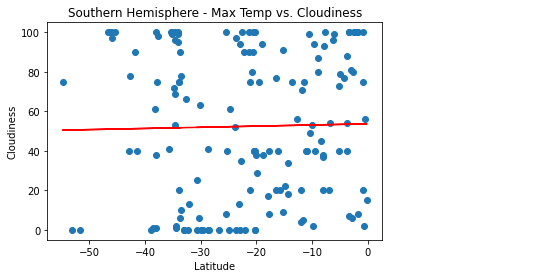

In [63]:
x_val=south_hem['lat']
y_val=south_hem['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Max Temp vs. Cloudiness")
plt.show

In [64]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling average cloud coverage to compare to the latitude. 
#from this I would say the further north you go, the more cloud coverage you will experience 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

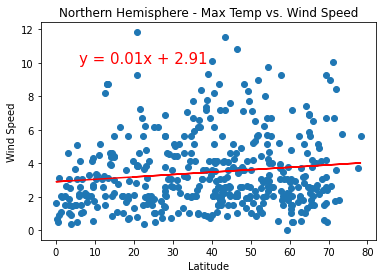

In [65]:
x_val=north_hem['lat']
y_val=north_hem['wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Max Temp vs. Wind Speed")
plt.show

In [66]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling average wind speed to compare to the latitude. 
#The more you move towards the north pole, the windier it can get. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

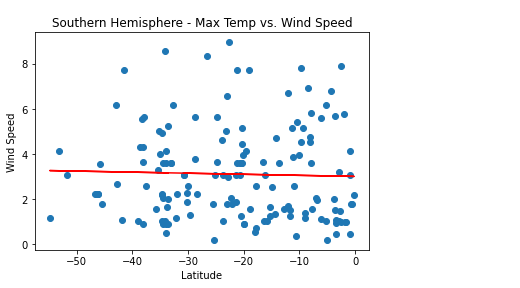

In [67]:
x_val=south_hem['lat']
y_val=south_hem['wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val, regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Max Temp vs. Wind Speed")
plt.show

In [68]:
#I have the code pulling from the weather_df that was created after removing cities not found. 
#The code is taking the found cities and their pulling average wind speed to compare to the latitude. 
#The more you move towards the south pole, it can get windier 